In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import global_params as G
plt.rcParams['figure.figsize'] = G.SMALL_FIG

In [3]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift

np.set_printoptions(precision=4, suppress=True)

In [4]:
from wavegen import sine_wave, cosine_wave
from sampling import sample_waveform, interpolate
from freq_domain import plotspec

### Ex 6.6

In [5]:
Ts = 1e-5
downsample_factor = 20 # Sampling rate becomes 20*Ts
t, w = sine_wave(100, 0.05, Ts) # This is treated like a continuous signal
wk = sample_waveform(w, 5000, Ts)

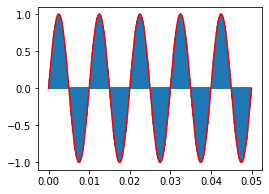

In [6]:
plt.figure()
plt.plot(t, wk)
plt.plot(t, w, 'r')
plt.show()

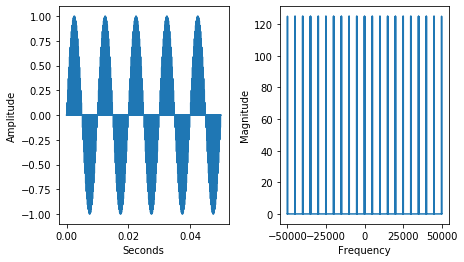

In [7]:
plotspec(wk, Ts);

### Ex 6.7

In [8]:
from wavegen import awgn, mysinc

In [9]:
Ts = 1/10000
duration = 0.3
freq_c = 1000
freq_m = 50

Fs = 1/Ts

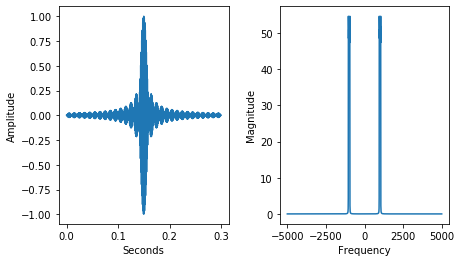

In [10]:
# Transmitter
t, baseband = mysinc(freq_m, duration, Ts)
_, carrier = cosine_wave(freq_c, duration, Ts)
transmit = baseband*carrier
plotspec(transmit, Ts);

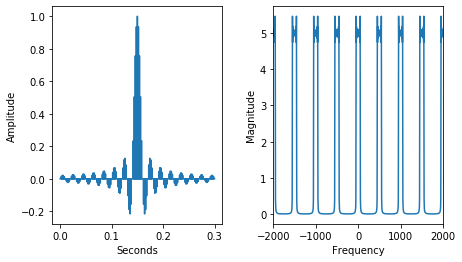

In [11]:
fs = freq_c/2;
#fs = freq_c/1.8 # Incorrect sampling (ex 6.8)
receive = sample_waveform(transmit, fs, Ts)

# Plot the downsampled signal
plotspec(receive, Ts)
plt.xlim(-2000, 2000);

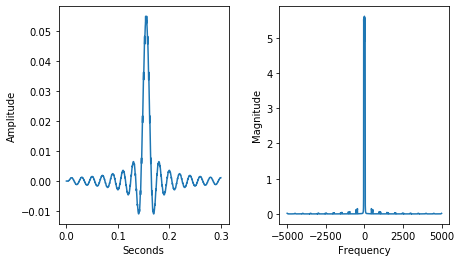

In [12]:
freqs = [0, 0.02, 0.03, 1] # In terms of Fs/2 (not fs/2) 
damps = [1, 1, 0, 0]
b = signal.firls(99, freqs, damps)
m = signal.lfilter(b, 1, receive)

plotspec(m, Ts);

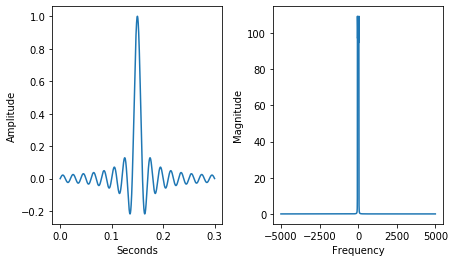

In [13]:
plotspec(baseband, Ts);

### Ex 6.9

In [14]:
import wavegen as waves

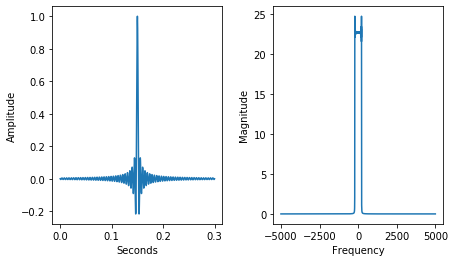

In [15]:
Ts = 1e-4
duration = 0.3
t, w = waves.mysinc(220, duration, Ts)
plotspec(w, Ts);

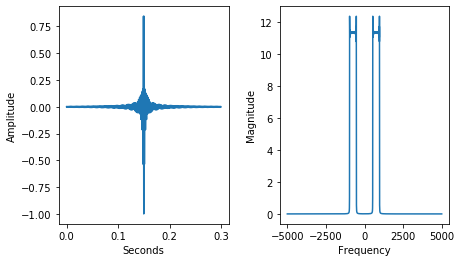

In [16]:
f_c = 1500//2
t, carrier = waves.cosine_wave(f_c, duration, Ts)
x1 = w*carrier
plotspec(x1, Ts);

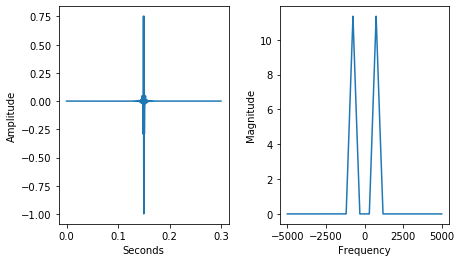

In [17]:
x2 = w*x1
plotspec(x2, Ts);

Sampling rate: 2500.0


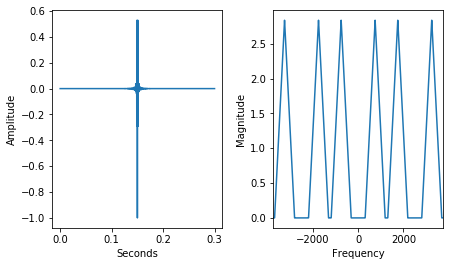

In [18]:
fs = 1/(400e-6)
print(f'Sampling rate: {fs}')
x3 = sample_waveform(x2, fs, Ts)
plotspec(x3, Ts);
plt.xlim(-3750, 3750);

### Ex 6.10

In [19]:
from bands import Band, Bands

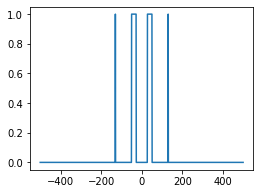

In [20]:
b = Bands((-11, 11), Ts=1e-3)
b.modulate(39)
b.add_band((130, 130), (-130, -130))
b.plot()

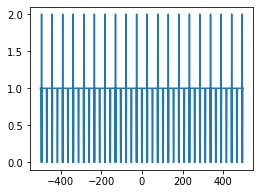

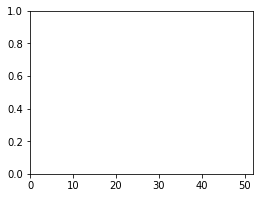

In [21]:
fs = 52
b.sample(fs)
b.plot()
plt.xlim(0,fs);

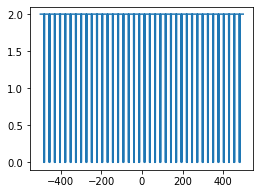

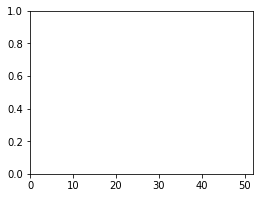

In [22]:
b.modulate(13)
b.plot()
plt.xlim(0, fs);

### Ex 6.11

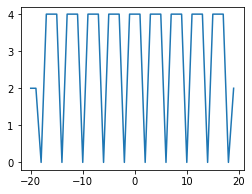

[(-21, -19), (-21, -19), (-17, -15), (-17, -15), (-17, -15), (-17, -15), (-13, -11), (-13, -11), (-13, -11), (-13, -11), (-9, -7), (-9, -7), (-9, -7), (-9, -7), (-5, -3), (-5, -3), (-5, -3), (-5, -3), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (3, 5), (3, 5), (3, 5), (3, 5), (7, 9), (7, 9), (7, 9), (7, 9), (11, 13), (11, 13), (11, 13), (11, 13), (15, 17), (15, 17), (15, 17), (15, 17), (19, 21), (19, 21)]

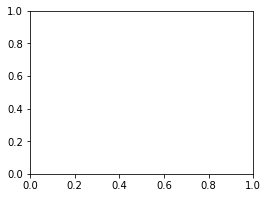

In [23]:
b = Bands((-1, 1), Ts=1/40).modulate(6)
fs = 4
b.sample(fs)
f0 = 2
b.modulate(2)
b.plot()
plt.ylim(0)
b

### Ex 6.12

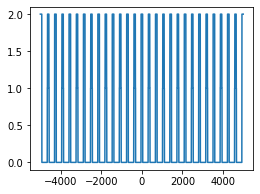

[(-5010, -4930), (-5010, -4930), (-4660, -4580), (-4650, -4570), (-4300, -4220), (-4300, -4220), (-3950, -3870), (-3940, -3860), (-3590, -3510), (-3590, -3510), (-3240, -3160), (-3230, -3150), (-2880, -2800), (-2880, -2800), (-2530, -2450), (-2520, -2440), (-2170, -2090), (-2170, -2090), (-1820, -1740), (-1810, -1730), (-1460, -1380), (-1460, -1380), (-1110, -1030), (-1100, -1020), (-750, -670), (-750, -670), (-400, -320), (-390, -310), (-40, 40), (-40, 40), (310, 390), (320, 400), (670, 750), (670, 750), (1020, 1100), (1030, 1110), (1380, 1460), (1380, 1460), (1730, 1810), (1740, 1820), (2090, 2170), (2090, 2170), (2440, 2520), (2450, 2530), (2800, 2880), (2800, 2880), (3150, 3230), (3160, 3240), (3510, 3590), (3510, 3590), (3860, 3940), (3870, 3950), (4220, 4300), (4220, 4300), (4570, 4650), (4580, 4660), (4930, 5010), (4930, 5010)]

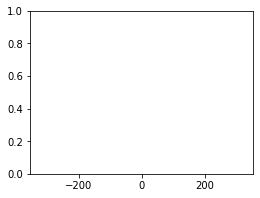

In [24]:
u = Bands((-40, 40)).modulate(1600)#.add_band((-860, -720), (720, 860))
u.modulate(1240)
fs = 710
u.sample(fs)
u.plot()
plt.xlim(-fs/2, fs/2)
u

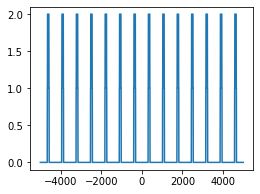

In [25]:
Bands((-40, 40)).modulate(360).sample(710).plot()

### Ex 6.13

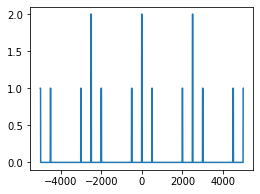

[(-5010, -4990), (-4510, -4490), (-3010, -2990), (-2510, -2490), (-2510, -2490), (-2010, -1990), (-510, -490), (-10, 10), (-10, 10), (490, 510), (1990, 2010), (2490, 2510), (2490, 2510), (2990, 3010), (4490, 4510), (4990, 5010)]

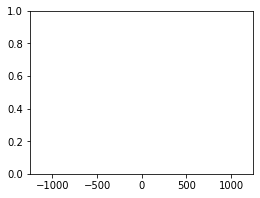

In [26]:
fs = 2500
b = Bands((-10, 10)).modulate(1000).sample(fs)
b.modulate(1000)
b.plot()
plt.xlim(-fs/2, fs/2)
b

## Interpolation

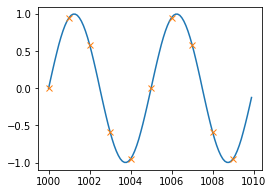

In [27]:
# Example 6.3 - Interpolation
fs = 20
Ts =1/100
duration=20
t, sig = sine_wave(fs, duration, Ts)
over = 100
intfac = 10
tnow = np.arange(10/Ts, 10.1/Ts, 1/10)
wsmooth = np.zeros_like(tnow)
for idx, curr in enumerate(tnow):
    wsmooth[idx] = interpolate(sig, curr, over)
plt.plot(tnow, wsmooth)
plt.plot(np.arange(1000,1010), sig[1000:1010], 'x');

### L6.6

array([0.227 , 0.227 , 0.227 , 0.2271, 0.2271, 0.2271, 0.2271, 0.2271,
       0.2271, 0.2271])

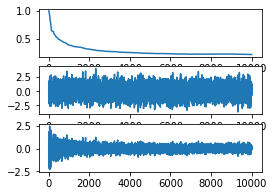

In [28]:
n = 10000 # Steps in simulation
inp_pow = 1.0
r = np.random.randn(n) * np.sqrt(inp_pow)

ds = 0.15 # desired output power
mu = 0.001 # step size
lenavg = 10 # Length over which to average

a = np.zeros_like(r)
a[0] = 1 # Initialize AGC parameter

s = np.zeros_like(r) # Initialize outputs
avec = np.zeros((lenavg,))

for k, r_k in enumerate(r):
    s[k] = a[k] * r_k
    avec = np.roll(avec, 1)
    avec[0] = np.sign(a[k])*(s[k]**2 - ds) # J_{N}
    avec[0] = (s[k]**2 - ds)*(s[k]**2/a[k]) # J_{LS}
    try:
        a[k+1] = a[k] - mu * np.mean(avec)
    except IndexError:
        break

plt.subplot(311); plt.plot(a)
plt.subplot(312); plt.plot(r)
plt.subplot(313); plt.plot(s);

a[-10:]